In [9]:
import torch
import torch.nn
import torchvision.transforms as transforms
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader
from plate_notplate_dataset import plate_notplate_dataset
from utils import *
from loss import YoloLoss
from model import Yolov1
import os, sys
import matplotlib.pyplot as plt

seed = 123
torch.manual_seed(seed= seed)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
LEARNING_RATE = 1e-5
BATCH_SIZE = 4
WEIGHT_DECAY = 0
EPOCHES = 1000
NUM_WORKERS = 2
PIN_MEMORY = True
LOAD_MODEL = False
LOAD_MODEL_ADDRESS = "C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\main\\weigths\\weights.pt"
PLATE_LABELS_PATH = "C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\plate_labels"
PLATE_IMAGES_PATH = "C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\plates_image"
NOTPLATE_LABELS_PATH = "C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\notplate_labels"
NOTPLATE_IMAGES_PATH = "C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\notplate_image"
ANNOTATION_PATH  = "C:\\Users\\Asus\\Desktop\\Projects\\licence plate detection\\annotation.csv"


class Compose(object):
    def __init__(self,transforms):
        self.transforms = transforms

    def __call__(self , img , bboxes):
        for t in self.transforms:
            img , bboxes = t(img), bboxes
        return   img , bboxes
    
# we have to reshape the pictures to 448 * 448 * 3 as the paper say's

transform = Compose([transforms.Resize((448,448)) , transforms.ToTensor()])


def train_fn(train_loader , model , optimizer , loss_fn):
    loop = tqdm(train_loader , leave=True)
    mean_loss= []
    for batch_idx , (x ,  y) in enumerate(loop):
        x , y = x.to(DEVICE) , y.to(DEVICE)
        pred = model(x)
        loss = loss_fn(pred , y)
        mean_loss.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # update the bar
        loop.set_postfix(loss = loss.item())

    print(f"Mean loss is {sum(mean_loss) / len(mean_loss)}")



model = Yolov1(
    num_boxes=2 , num_classes=1 , split_size=7
).to(DEVICE)
optimizer = optim.Adam(
    params=model.parameters(),
    lr=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY
)
loss_fn = YoloLoss()
if LOAD_MODEL:
    load_checkpoint(torch.load(LOAD_MODEL_ADDRESS) , model , optimizer)
train_dataset = plate_notplate_dataset(
    csv_file=ANNOTATION_PATH,
    plate_image_dir=PLATE_IMAGES_PATH,
    plate_label_dir=PLATE_LABELS_PATH,
    notplate_image_dir=NOTPLATE_IMAGES_PATH,
    notplate_label_dir=NOTPLATE_LABELS_PATH,
    S = 7,
    C = 1,
    B = 2,
    transform=transform
)

train_loader = DataLoader(
    dataset=train_dataset ,
    batch_size=BATCH_SIZE,
    shuffle=True,
    # num_workers=NUM_WORKERS,
    pin_memory=PIN_MEMORY,
    drop_last=True
)


5384
5384


5384
5384
torch.Size([4, 3, 448, 448])


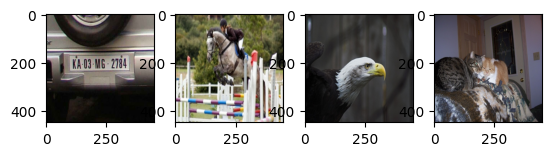

In [15]:
for idx ,(x, y) in enumerate(train_loader):
    print(x.shape)
    for i in range(4):
        plt.subplot(1,4, i+1)
        # plt.figure(figsize=(5,5))
        # print(x.shape)
        plt.imshow(x[i].permute(1,2,0).numpy())
    break